In [1]:
import geopandas as gpd
import ipyleaflet
import ipywidgets as widgets
import logging
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon
import warnings
import sliderule.icesat2
import sliderule.io
import sliderule.ipysliderule
import pandas as pd
from datetime import datetime
import pickle
warnings.filterwarnings('ignore')
# Configure ICESat-2 API
from sliderule import sliderule, icesat2, earthdata, h5
icesat2.init("slideruleearth.io", verbose=True)
sliderule.update_available_servers()

(7, 0)

In [2]:
# should use the pickle version once I create it.
poly = r'D:\2410_Grounding-Line\AOI_IS2_Download.shp'
gdf = gpd.read_file(poly)
gdf.head()


,id,geometry
0,None,"POLYGON ((-23.05033 77.04254, -21.55228 76.917..."


Completed in 9.544 seconds of wall-clock time
Reference Ground Tracks: [284]
Cycles: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 16 17 18 19 21 22 23 24]
Received 220897 elevations
Completed in 8.635 seconds of wall-clock time
Reference Ground Tracks: [284]
Cycles: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 16 17 18 19 21 22 23 24]
Received 220897 elevations


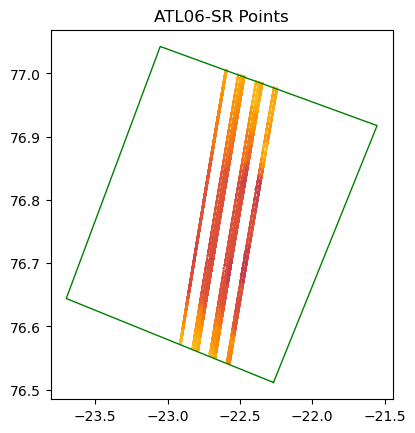

In [3]:
region = sliderule.toregion(poly)["poly"]
region
# Prepare coordinate lists for plotting the region of interest polygon
region_lon = [e["lon"] for e in region]
region_lat = [e["lat"] for e in region]

# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 100.0,
    "res": 20.0,
    "rgt": 284
}

import time
# Latch Start Time
perf_start = time.perf_counter()

# Request ATL06 Data
atl06_sr = icesat2.atl06p(parms)

# Latch Stop Time
perf_stop = time.perf_counter()

# Display Statistics
perf_duration = perf_stop - perf_start
print("Completed in {:.3f} seconds of wall-clock time".format(perf_duration))
print("Reference Ground Tracks: {}".format(atl06_sr["rgt"].unique()))
print("Cycles: {}".format(atl06_sr["cycle"].unique()))
print("Received {} elevations".format(atl06_sr.shape[0]))

f, ax = plt.subplots()
ax.set_title("ATL06-SR Points")
ax.set_aspect('equal')
atl06_sr.plot(ax=ax, column='h_mean', cmap='inferno', s=0.1)
ax.plot(region_lon, region_lat, linewidth=1, color='g');
import time
# Latch Start Time
perf_start = time.perf_counter()

# Request ATL06 Data
atl06_sr = icesat2.atl06p(parms)

# Latch Stop Time
perf_stop = time.perf_counter()

# Display Statistics
perf_duration = perf_stop - perf_start
print("Completed in {:.3f} seconds of wall-clock time".format(perf_duration))
print("Reference Ground Tracks: {}".format(atl06_sr["rgt"].unique()))
print("Cycles: {}".format(atl06_sr["cycle"].unique()))
print("Received {} elevations".format(atl06_sr.shape[0]))

In [4]:
import time
# Latch Start Time
perf_start = time.perf_counter()

# Request ATL06 Data
atl06_sr = icesat2.atl06p(parms)

# Latch Stop Time
perf_stop = time.perf_counter()

# Display Statistics
perf_duration = perf_stop - perf_start
print("Completed in {:.3f} seconds of wall-clock time".format(perf_duration))
print("Reference Ground Tracks: {}".format(atl06_sr["rgt"].unique()))
print("Cycles: {}".format(atl06_sr["cycle"].unique()))
print("Received {} elevations".format(atl06_sr.shape[0]))

Completed in 11.276 seconds of wall-clock time
Reference Ground Tracks: [284]
Cycles: [ 1  2  3  4  5  6  7  8 10 11 12 13 14 16 17 18 19 21 22 23 24]
Received 220897 elevations


In [5]:
# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 100.0,
    "res": 20.0,
    "rgt": 284
}

In [6]:
# Assuming your GeoDataFrame is named atl06_sr
# Convert index to a normal column
atl06_sr = atl06_sr.reset_index()

# Extract year, month, and day from the 'time' column
atl06_sr['year'] = atl06_sr['time'].dt.year.astype(str)
atl06_sr['month'] = atl06_sr['time'].dt.month.astype(str).str.zfill(2)
atl06_sr['day'] = atl06_sr['time'].dt.day.astype(str).str.zfill(2)

# Create a new 'date' column in 'DD-MM-YYYY' format
atl06_sr['date'] = atl06_sr['day'].astype(str)+atl06_sr['month'].astype(str)+atl06_sr['year'].astype(str)

# Display the updated GeoDataFrame
print(atl06_sr[['time', 'year', 'month', 'day', 'date']])

atl06_sr['time'] = atl06_sr['time'].astype(str)

atl06_sr.to_file(r'D:\2410_Grounding-Line\Storstrommen_284.shp', driver='ESRI Shapefile')

atl06_sr = atl06_sr.to_crs(epsg=3413)
atl06_sr.head(5)

                                time  year month day      date
0      2018-10-17 05:30:51.549819904  2018    10  17  17102018
1      2018-10-17 05:30:51.552648448  2018    10  17  17102018
2      2018-10-17 05:30:51.555476992  2018    10  17  17102018
3      2018-10-17 05:30:51.558304768  2018    10  17  17102018
4      2018-10-17 05:30:51.561128960  2018    10  17  17102018
...                              ...   ...   ...  ..       ...
220892 2024-07-06 01:45:32.288548608  2024    07  06  06072024
220893 2024-07-06 01:45:32.291364608  2024    07  06  06072024
220894 2024-07-06 01:45:32.294178816  2024    07  06  06072024
220895 2024-07-06 01:45:32.296993536  2024    07  06  06072024
220896 2024-07-06 01:45:32.299809280  2024    07  06  06072024

[220897 rows x 5 columns]


,time,region,segment_id,x_atc,y_atc,cycle,n_fit_photons,spot,h_sigma,gt,...,rgt,pflags,rms_misfit,w_surface_window_final,h_mean,geometry,year,month,day,date
0,2018-10-17 05:30:51.549819904,5,572790,11473830.0,-3278.895264,1,302,2,0.016778,50,...,284,0,0.291551,3.0,171.837643,POINT (538754.459 -1306814.867),2018,10,17,17102018
1,2018-10-17 05:30:51.552648448,5,572791,11473850.0,-3278.885986,1,299,2,0.015185,50,...,284,0,0.262135,3.0,171.811340,POINT (538758.819 -1306834.025),2018,10,17,17102018
2,2018-10-17 05:30:51.555476992,5,572792,11473870.0,-3278.871094,1,295,2,0.015499,50,...,284,0,0.266122,3.0,171.789934,POINT (538763.187 -1306853.189),2018,10,17,17102018
3,2018-10-17 05:30:51.558304768,5,572793,11473890.0,-3278.850342,1,298,2,0.013686,50,...,284,0,0.236064,3.0,171.797562,POINT (538767.560 -1306872.352),2018,10,17,17102018
4,2018-10-17 05:30:51.561128960,5,572794,11473910.0,-3278.823975,1,311,2,0.012511,50,...,284,0,0.220213,3.0,171.787487,POINT (538771.939 -1306891.514),2018,10,17,17102018


In [7]:
atl06_sr = atl06_sr.to_crs(epsg=3413)

In [11]:
import os
# Define output folder for Shapefiles
output_folder = r"D:\2410_Grounding-Line\IS2_tracks\284"
os.makedirs(output_folder, exist_ok=True)

# Loop through unique dates and save a Shapefile for each
for date in atl06_sr['date'].unique():
    subset = atl06_sr[atl06_sr['date'] == date]
    cycle = subset['cycle'].iloc[0]
    output_path = os.path.join(output_folder, f"atl06_sr_{cycle}_{date.replace('-', '_')}.shp")
    subset.to_file(output_path, driver='ESRI Shapefile')

print(f"Shapefiles saved in: {output_folder}")

1
2
3
4
5
6
7
8
10
11
12
13
14
16
17
18
19
21
22
23
24
Shapefiles saved in: D:\2410_Grounding-Line\IS2_tracks\284
